##Introduction

In this project, we will explore a dataset containing information about various clients of a telecommunications company in the U.S. Our objectives are as follows:



*   Data Manipulation: We will clean and preprocess the data to ensure it is
suitable for analysis.
*   Data Visualization: We will create visual representations to better understand client behavior and trends.
*   Model Fitting: We will apply machine learning techniques to fit a predictive
model.

**Main Goal**: Our primary objective is to develop a model that predicts whether clients will stay with the company or leave, based on various parameters.

**Our data consists of:**


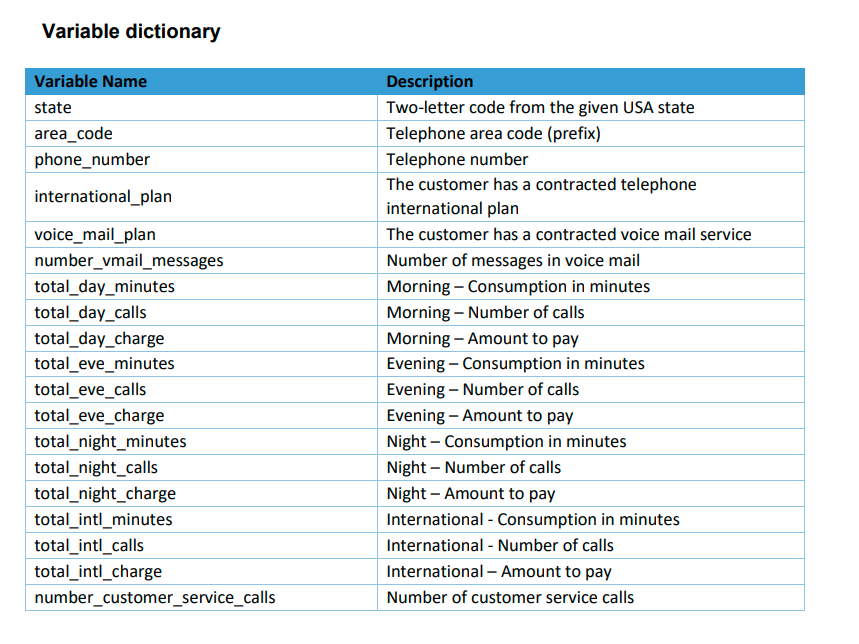

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report




In [2]:
churn=pd.read_csv('churn_all.csv',sep=",")
##Check the first rows of our dataset
churn.head()

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
##Print the size of our data
print(len(churn))
##Print data information (types, memory,columns...)
print(churn.info())

5000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   area_code                      5000 non-null   int64  
 2   phone_number                   5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-nul

In [4]:
##Check for null values
churn.isna().sum()

,0
state,0
area_code,0
phone_number,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


We check for repeated phone numbers to identify any duplicate clients.

In [ ]:
##No duplicated phone numbers
churn.loc[churn.duplicated(subset="phone_number")]

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn


##Visualizations

For all binary variables, the percentage of churned data in each category should be approximately within these ranges. If not, there may be a significant influence from that feature.

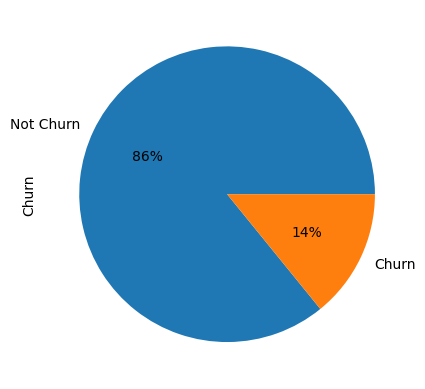

In [ ]:
##Churn clients pie chart. Percentage of clients that left the company
churn.groupby("Churn")["Churn"].count().plot(kind="pie",labels=["Not Churn","Churn"],autopct='%1.0f%%')
plt.savefig("churn_pie.png")

We analyze the churn rates for clients who have acquired the international plan and the voicemail plan. The results clearly show that the international plan faces a significantly higher churn rate, indicating that this variable is likely to be significant.

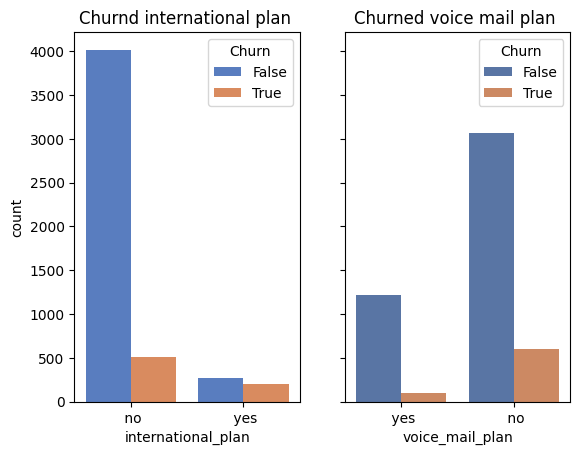

In [109]:
fig,(ax0,ax1)=plt.subplots(nrows=1,ncols=2,sharey=True)
sns.countplot(x='international_plan', data=churn,hue="Churn",ax=ax0,palette="muted",color="g").set(title="Churnd international plan ")

sns.countplot(x="voice_mail_plan",hue="Churn",data=churn,palette="deep",ax=ax1).set(title="Churned voice mail plan ")
plt.legend(title="Churn")
plt.show()

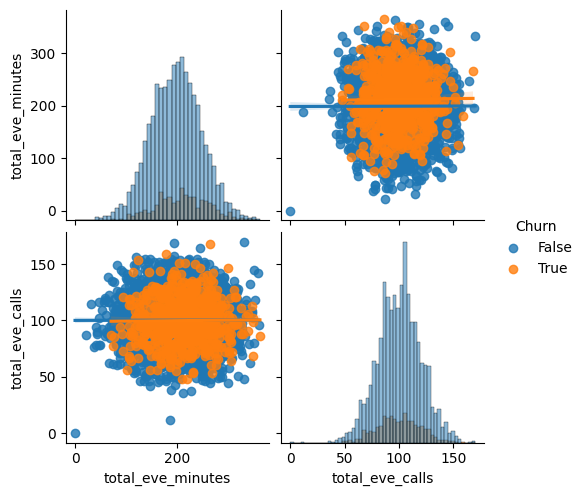

In [15]:

sns.pairplot(churn,vars=["total_eve_minutes","total_eve_calls"],kind="reg",diag_kind="hist",hue="Churn")

We create a boxplot of the main three number of calls categories. When plotting we appreciated three outliers from the day calls column. Their number of monthly calls was over 10000, while their amount charged we checked was not even on the third quantile, therefore we decided to adjust them to the mean so they did not have a negative effect on our plot and future prediction.

We observe a similar distribution of calls throughout the day. As expected, the number of international calls is significantly lower compared to daytime, evening, and nighttime communications.

{'whiskers': [<matplotlib.lines.Line2D at 0x7ca34a193880>,
 'caps': [<matplotlib.lines.Line2D at 0x7ca34a193dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ca34a193610>,
 'medians': [<matplotlib.lines.Line2D at 0x7ca34a1e8340>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ca34a1e85e0>,
 'means': []}

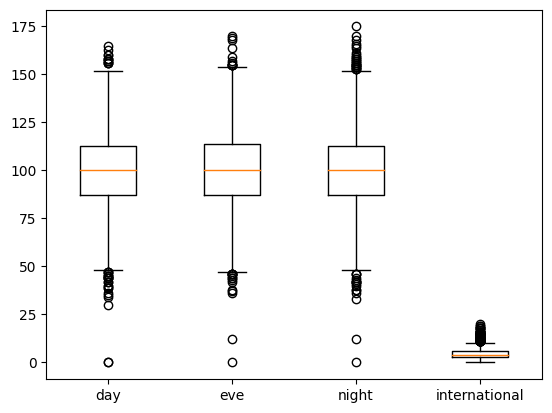

In [80]:
churn.loc[churn['total_day_calls'] > 9000, 'total_day_calls'] = churn["total_day_calls"].mean()
plt.boxplot([churn["total_day_calls"],churn['total_eve_calls'],churn["total_night_calls"],churn["total_intl_calls"]], labels=['day', 'eve',"night","international"])

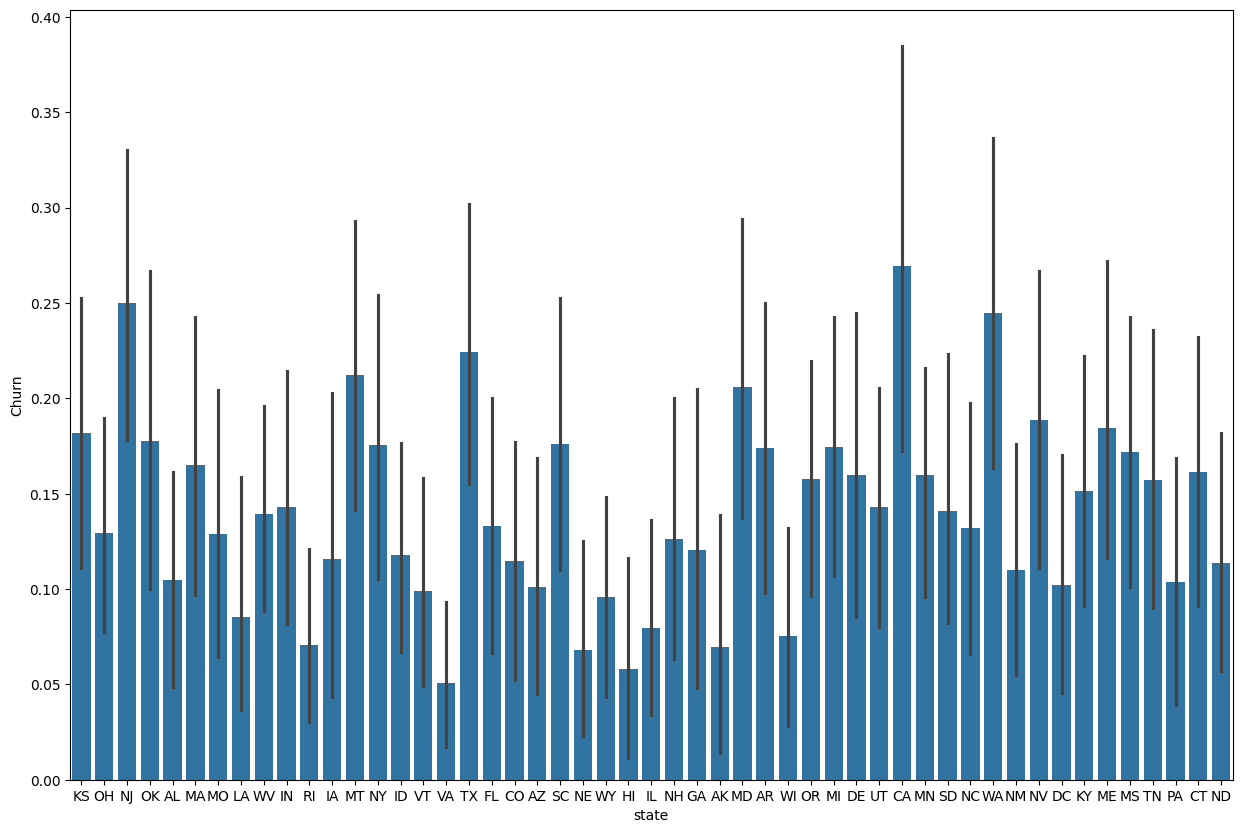

In [112]:
plt.figure(figsize=(15,10))
sns.barplot(x="state",y="Churn",data=churn)
plt.show()

Our goal is to train a predictive model. Features such as phone number, area code, and state are solely used for identifying individual clients and offer no value for training a supervised learning model. Therefore, we will exclude these three features for the time being due to their lack of relevance.

In [117]:
churn=churn.drop(["state","phone_number","area_code"],axis=1)

Below is a heatmap showing the correlations between variables. The plot reveals extremely high correlations between the variables measuring the number of minutes consumed and the amount charged for each client, based on the type of call (morning, evening, night, or international). This indicates that the charges are directly determined by the number of minutes spent on the phone in different scenarios.

When such strong linear relationships exist, multicollinearity can arise when fitting the model due to redundant data. To avoid this issue, we will remove the four features related to the amount charged.

There is another strong correlation between the number of voicemail messages and the presence of a contracted voicemail service. Although the correlation is not completely linear, we can still omit the number of voicemail messages.

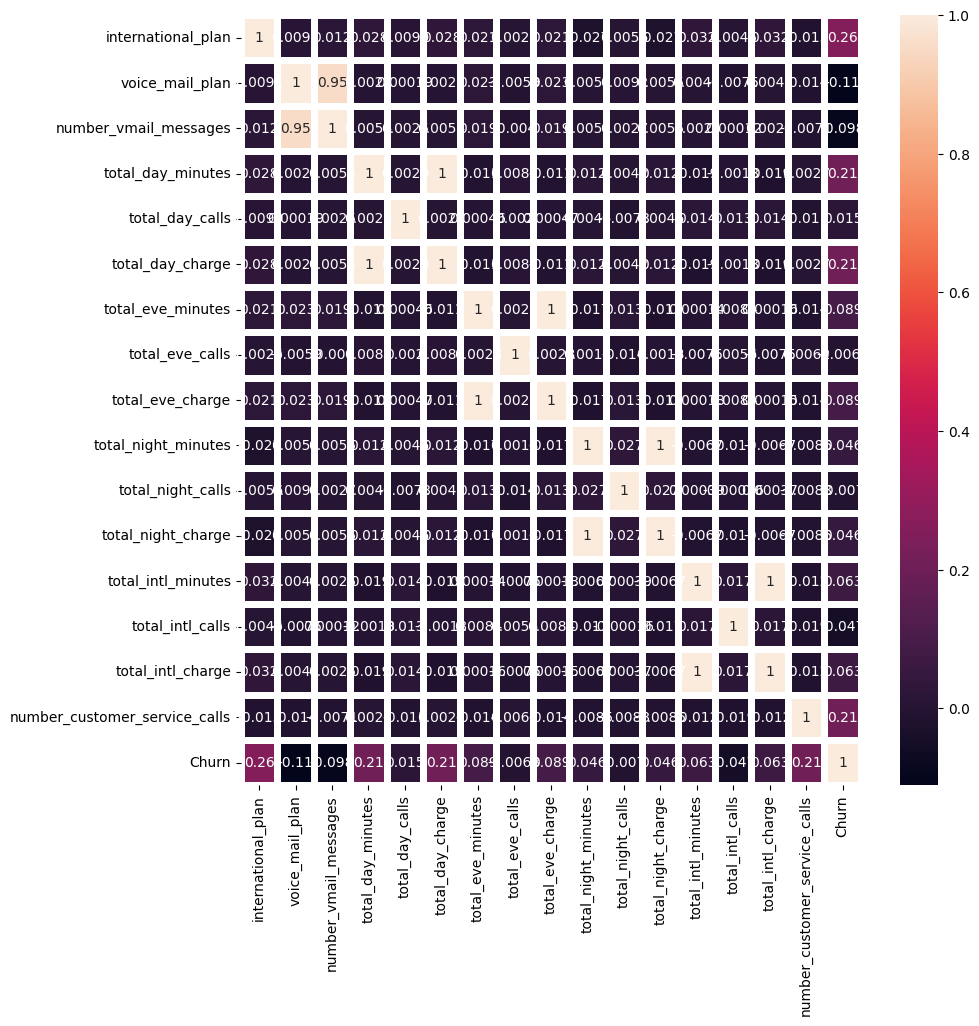

In [118]:
##We have to encode str binary variables into (1,0) to compute the correlation
##LabelEncoder from skicit-learn library
le=LabelEncoder()
churn["Churn"]=le.fit_transform(churn["Churn"])
churn["international_plan"]=le.fit_transform(churn["international_plan"])
churn["voice_mail_plan"]=le.fit_transform(churn["voice_mail_plan"])
##Compute the correlations between features
corr=churn.corr()
##Heatmap of the correlations using seaborn
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidths=5)
plt.savefig("churn.png")


Checking the linear correlation graphically

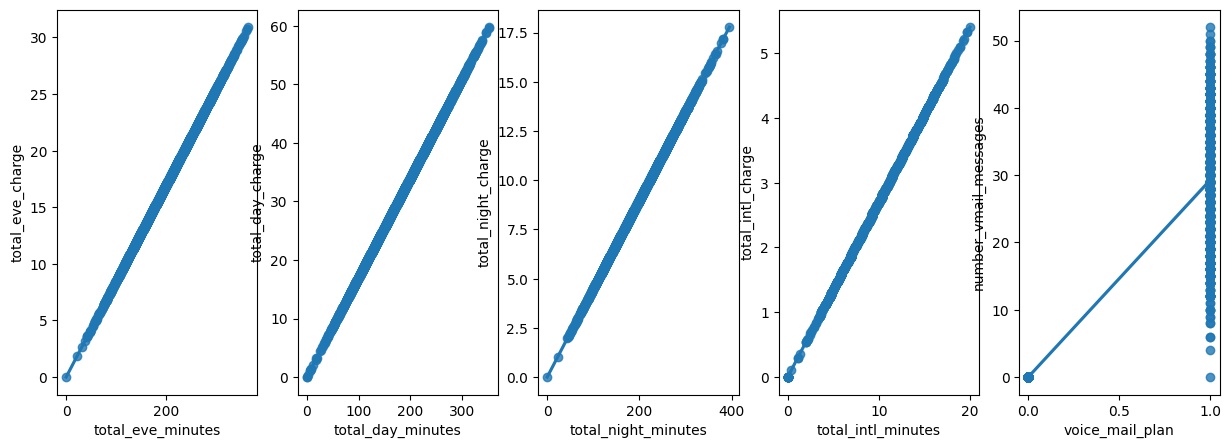

In [127]:
##Scatter plot of each of the four doubles that turned out to be highly correlated from the corr matrix
fig,(ax0,ax1,ax2,ax3,ax4)=plt.subplots(nrows=1,ncols=5,figsize=(15,5))

sns.regplot(x="total_eve_minutes",y="total_eve_charge",ax=ax0,data=churn)
sns.regplot(x="total_day_minutes",y="total_day_charge",ax=ax1,data=churn)
sns.regplot(x="total_night_minutes",y="total_night_charge",ax=ax2,data=churn)
sns.regplot(x="total_intl_minutes",y="total_intl_charge",ax=ax3,data=churn)
sns.regplot(x="voice_mail_plan",y="number_vmail_messages",ax=ax4,data=churn)
plt.savefig("churn2.png")


In [ ]:
##Drop columns to avoid mulicolineality
churn.drop(["total_eve_charge","total_day_charge","total_night_charge","total_intl_charge","number_vmail_messages"],axis=1,inplace=True)

## Create a categorical variable dividing data consumption in two categories

The task requires grouping clients into two consumption levels. To achieve this, we sum the consumption variables (phone minutes) and create a new variable called "sum-consumption." This variable is then divided into two categories: clients above the median and clients below the median. As a result, we obtain a categorical variable that reasonably groups customers into two consumption levels.

In [ ]:
##sum the consumption features into the sum_consumption variable
churn["sum_consumption"]=churn["total_night_minutes"]+churn["total_eve_minutes"]+churn["total_day_minutes"]+churn["total_intl_minutes"]
##Compute the median and store it
median=np.median(churn["sum_consumption"])
print(median)
##When checking the describe method we can see that the mean is not too far off from the median. We could have used the mean therefore
churn["sum_consumption"].describe()

592.3999999999999


,sum_consumption
count,5000.000000
mean,591.578860
std,89.071881
min,284.300000
25%,531.200000
50%,592.400000
75%,652.025000
max,885.000000


In [ ]:
##Turn sum_consumption binary
churn["sum_consumption"]=churn["sum_consumption"].apply(lambda x: "1" if x>median else "0")
churn.head()

,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,Churn,sum_consumption
0,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1
1,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1
2,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0
3,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,0
4,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,0


##Building a classification model

After having tried differente models such as K-Nearest Neighbours, Bayesian Classification or Gradient Boosting, I decided to fit a Random Forest Classification to the data

##Random Forest Classification

We will attempt to fit a RandomForest model to our data. Initially, we train the model using default settings, with the exception of setting the number of estimators (trees used to compute the average) to 100. While a grid search could be performed to fine-tune the model's parameters, time constraints prevented us from doing so.

The most important variables were selected beforehand by evaluating their correlations and utility.

To fit the model, we use a train-test split for the target variable y and the explanatory variables X.

 We train the model on the training subset of the data and then evaluate its performance by comparing the predictions made on the test subset of the data with the actual values of the target variable.

In [ ]:
X=churn.drop("Churn",axis=1)
y=churn["Churn"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_rf=model.predict(X_test)


The confusion matrix is defined as a matrix that summarizes the test set prediction outcomes. It shows the True positive, False Positive, False Negative and True Negative values of our prediction.

To asses the model performance we will use three basic measures from our confusion matrix: accuaracy, accuaracy and recall.


**Accuaracy**: Is defined as the overall performance of the prediction. General percetage of correct predictions

**Precision**: Percentage of correct predictions through churning observations

**Recall**: Percentage of churning predictions through correct predictions

We will use this goodness of fit measures to asses the models ability to predict

After calculating our metrics, we observe that both accuracy and precision are high, with values of 0.956 and 0.94, respectively, indicating a high percentage of correct predictions generally and through false statements.

 Since we are dealing with churn data, our goal is to minimize false positives (cases predicted as non-churn that actually churn). This is crucial as we aim to retain clients in our telecom company. Therefore, achieving a high precision is our priority, while recall is less critical, obtaining an acceptable recall score of 0.78

In [ ]:
##Model confusion matrix
print("Confusion matrix: \n",confusion_matrix(y_test, y_pred_rf))
# Model Accuracy, how often is the classifier correct?
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred_rf))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

Confusion matrix: 
 [[859   6]
 [ 38  97]]

Accuracy: 0.956
Precision: 0.941747572815534
Recall: 0.7185185185185186


We can also compute precision and recall for each binary prediction (churned and not churned)

In [ ]:
##Computation of more extended metrics
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       865
           1       0.94      0.72      0.82       135

    accuracy                           0.96      1000
   macro avg       0.95      0.86      0.90      1000
weighted avg       0.96      0.96      0.95      1000



To validate the model in a generalizable manner we use K-Fold cross validation (with 5 folds). We perfom this validation strategy with sklearn cross_val_score.

 The validation simply consists in assesing the model using an score, (accuaracy and precision in our case), for 5 different train and test splits of our churn dataset

In [ ]:
##Perform 5-fold cross validation to asses overfitting with accuaracy score
print(cross_val_score(model, X,y, cv=5).mean())

##Perform 5-fold cross validation to asses overfitting with precision score
print(cross_val_score(model, X,y, cv=5,scoring="precision").mean())

0.9558
0.9441356676760533


We can evaluate the contribution of each of our 12 features to the model using the feature_importances_ attribute from the RandomForestClassifier.

When we calculate these feature importances, they represent the accumulation of the impurity decrease within each tree, in relation with the gini index that allows to choose each variable for each node.

While the difference between the highest and lowest importance values across the features is not significant, we can clearly observe that total daytime minutes have a strong influence on the final churn decision. This may be due to higher fees during peak hours, which could lead to customer dissatisfaction and ultimately drive them to leave the company.

Other important contributors are the number of service calls, number of eve minutes consumption or the acquisition of an international plan as we forsaw earlier in the project.








In [ ]:
##create a listof the features without the objective variable
features=list(churn.columns)
features.remove("Churn")
##Compute the importance of each feature
importance = model.feature_importances_
##Sort the features by importance
index = np.argsort(importance)[::-1]
##Print the names of the features in order of importance
names = [features[i] for i in index]
print(importance)


[0.08547662 0.03310363 0.2592588  0.04948949 0.1018576  0.04687517
 0.06677604 0.0482219  0.08675363 0.06657493 0.12605495 0.02955724]


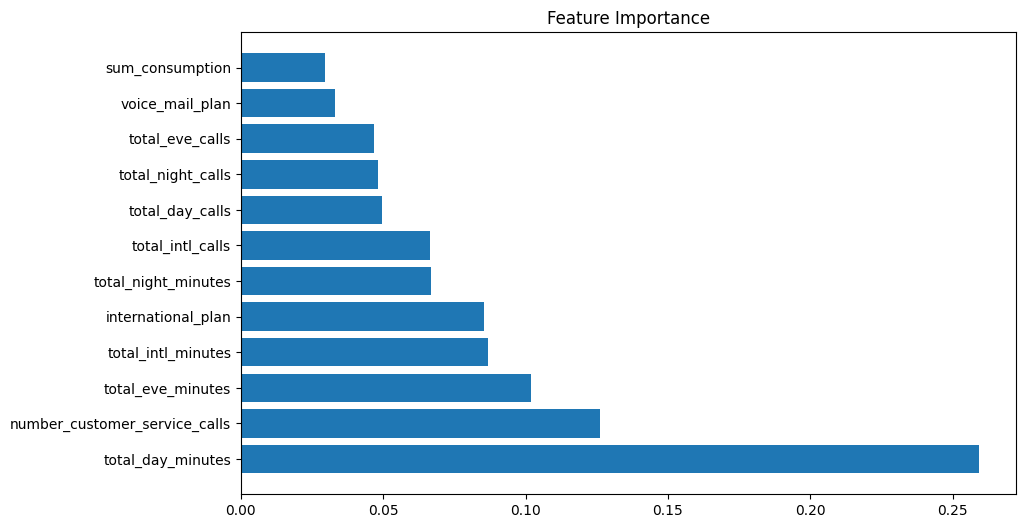

In [ ]:
##Plot each feature by importance
plt.figure(figsize=[10,6])
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importance[index])
plt.yticks(range(X.shape[1]), names)
plt.savefig("churn_featur.png")

## Selection of 500 customers

To carry on comerical actions we will have to focus on the 500 customers that are predicted to be more at risk, this is from all the clients that have not churned yet (we perform a query), we will compute the ones that have the highest probabilities of churning when

In [ ]:
churn.head()

,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,Churn,sum_consumption
0,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1
1,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1
2,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0
3,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,0
4,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,0


In [ ]:
churn_clients=churn[churn["Churn"]==0]
X_clients=churn_clients.drop("Churn",axis=1)
clients_probabilities=model.predict_proba(X_clients)
clients_probabilities=clients_probabilities[:,1]


In [ ]:
##Create pandas dataframe
customer_risk = pd.DataFrame({'CustomerID': X_clients.index, 'Churn_Probability': clients_probabilities})

# Sort customers by churn probability
customer_risk = customer_risk.sort_values(by='Churn_Probability', ascending=False)

# Select the top 500 from dataframe
topcustomers = customer_risk.head(500)
print(topcustomers)

      CustomerID  Churn_Probability
95           112               0.75
959         1095               0.69
3530        4110               0.62
3021        3526               0.58
2688        3140               0.58
...          ...                ...
1154        1319               0.07
1857        2149               0.07
953         1089               0.07
2091        2430               0.07
1922        2227               0.07

[500 rows x 2 columns]


##Summary

In this project, we worked with a dataset from a telecom company's clients, containing 20 different variables. Our primary objective was to build a predictive model to analyze how and why clients are churning.

During the data preprocessing phase, we identified certain features that were not informative and removed them, retaining only the following: 'international_plan', 'voice_mail_plan', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls', and 'sum_consumption'. Using these features, we developed a model capable of identifying customers likely to churn with an accuracy of 0.956. Additionally, the model successfully predicted actual churn cases with a precision of 0.9417.

We also ranked clients by their churn probability and identified the most important features influencing churn. The results revealed a strong correlation between customer dissatisfaction and high per-minute call prices at all hours of the day and internationally, suggesting that a price reduction may be necessary to improve retention.
